# Importing Libraries and Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
anket_1 = pd.read_csv('Anket1_preprocessed.csv')
anket_2 = pd.read_csv('Anket2_preprocessed.csv')
anket_3 = pd.read_csv('Anket3_preprocessed.csv')
anket_4 = pd.read_csv('Anket4_preprocessed.csv')

## Data extracting function

In [ ]:
def extract_values(dataframe, condition):
    values_list = []
    for index, row in dataframe.iterrows():
        for col in dataframe.columns:
            if condition in col:
                if col.startswith(condition):
                    values_list.append(row[col])
    return values_list

# Fillers

## Grammatical Fillers (Score-based)

In [ ]:
anket1_ctgram_scores = extract_values(anket_1, "CTGRAM")
anket2_ctgram_scores = extract_values(anket_2, "CTGRAM")
anket3_ctgram_scores = extract_values(anket_3, "CTGRAM")
anket4_ctgram_scores = extract_values(anket_4, "CTGRAM")

In [ ]:
total_ctgram_scores = anket1_ctgram_scores + anket2_ctgram_scores + anket3_ctgram_scores + anket4_ctgram_scores
total_ctgram_scores = pd.Series(total_ctgram_scores)

In [ ]:
total_ctgram_scores.describe()

count    715.000000
mean       1.860140
std        1.826514
min       -3.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Values for Grammatical Filler Sentences')

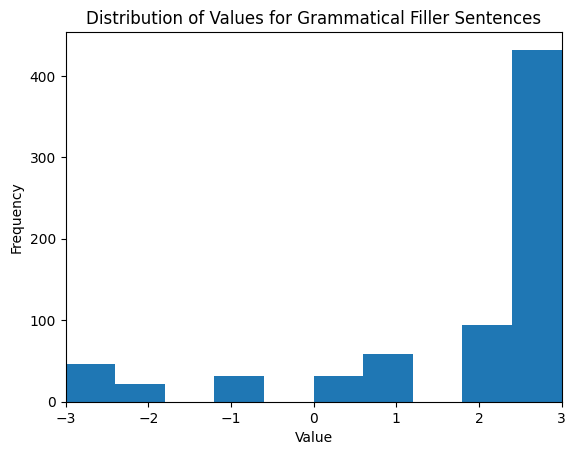

In [ ]:
plt.hist(total_ctgram_scores)

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for Grammatical Filler Sentences')

## Ungrammatical Fillers (Score-based)

In [ ]:
anket1_ctungram_scores = extract_values(anket_1, "CTUNGRAM")
anket2_ctungram_scores = extract_values(anket_2, "CTUNGRAM")
anket3_ctungram_scores = extract_values(anket_3, "CTUNGRAM")
anket4_ctungram_scores = extract_values(anket_4, "CTUNGRAM")

In [ ]:
total_ctungram_scores = anket1_ctungram_scores + anket2_ctungram_scores + anket3_ctungram_scores + anket4_ctungram_scores
total_ctungram_scores = pd.Series(total_ctungram_scores)

In [ ]:
total_ctungram_scores.describe()

count    715.000000
mean      -1.595804
std        1.710974
min       -3.000000
25%       -3.000000
50%       -2.000000
75%       -1.000000
max        3.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Values for Ungrammatical Filler Sentences')

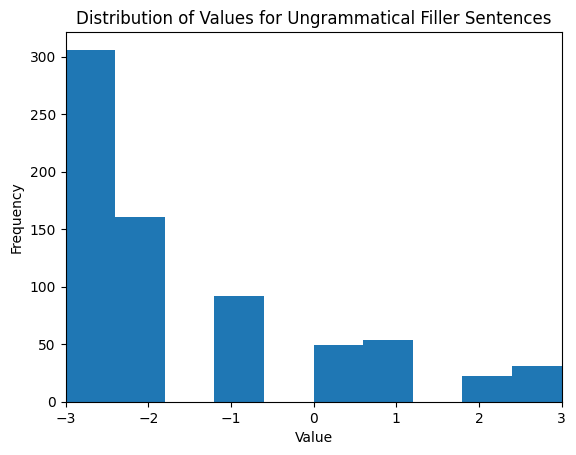

In [ ]:
plt.hist(total_ctungram_scores)

plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for Ungrammatical Filler Sentences')

## Grammatical Fillers (Informant-based)

In [ ]:
anket1_ctgram_p_scores = extract_values(anket_1, "ctgram_mean")
anket2_ctgram_p_scores = extract_values(anket_2, "ctgram_mean")
anket3_ctgram_p_scores = extract_values(anket_3, "ctgram_mean")
anket4_ctgram_p_scores = extract_values(anket_4, "ctgram_mean")

In [ ]:
total_ctgram_p_scores = anket1_ctgram_p_scores + anket2_ctgram_p_scores + anket3_ctgram_p_scores + anket4_ctgram_p_scores
total_ctgram_p_scores = pd.Series(total_ctgram_p_scores)

In [ ]:
total_ctgram_p_scores.describe()

count    65.000000
mean      1.860140
std       1.047685
min      -3.000000
25%       1.545455
50%       2.181818
75%       2.454545
max       3.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Average Values for Grammatical (Informant Based) Filler Sentences')

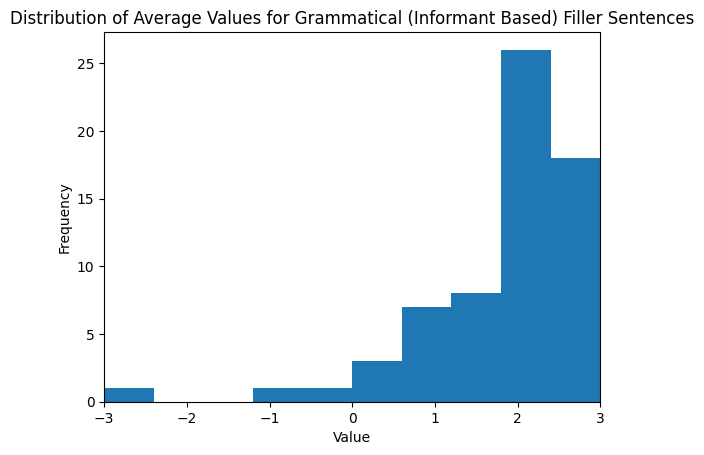

In [ ]:
plt.hist(total_ctgram_p_scores)

plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Average Values for Grammatical (Informant Based) Filler Sentences')

## Ungrammatical Fillers (Informant-based)

In [ ]:
anket1_ctungram_p_scores = extract_values(anket_1, "ctungram_mean")
anket2_ctungram_p_scores = extract_values(anket_2, "ctungram_mean")
anket3_ctungram_p_scores = extract_values(anket_3, "ctungram_mean")
anket4_ctungram_p_scores = extract_values(anket_4, "ctungram_mean")

In [ ]:
total_ctungram_p_scores = anket1_ctungram_p_scores + anket2_ctungram_p_scores + anket3_ctungram_p_scores + anket4_ctungram_p_scores
total_ctungram_p_scores = pd.Series(total_ctungram_p_scores)

In [ ]:
total_ctungram_p_scores.describe()

count    65.000000
mean     -1.595804
std       1.164097
min      -3.000000
25%      -2.454545
50%      -1.909091
75%      -1.090909
max       1.454545
dtype: float64

Text(0.5, 1.0, 'Distribution of Average Values for Ungrammatical (Informant Based) Filler Sentences')

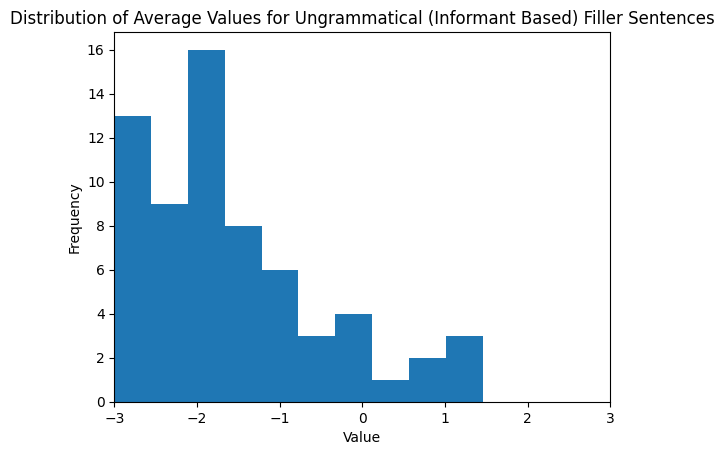

In [ ]:
plt.hist(total_ctungram_p_scores)

plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Average Values for Ungrammatical (Informant Based) Filler Sentences')

# Eliminating Outliers/Non-compliant Participants

In [ ]:
iqr_multiplier = 1.6

# Calculate IQR for each dataset using Q3 and Q1
iqr_ctungram = total_ctungram_p_scores.quantile(0.75) - total_ctungram_p_scores.quantile(0.25)
iqr_ctgram = total_ctgram_p_scores.quantile(0.75) - total_ctgram_p_scores.quantile(0.25)

# Calculate thresholds using IQR multiplier and Q3/Q1
UT_ung = total_ctungram_p_scores.quantile(0.25) + (iqr_multiplier * iqr_ctungram)
LT_ung = total_ctungram_p_scores.quantile(0.75) - (iqr_multiplier * iqr_ctungram)

UT_g = total_ctgram_p_scores.quantile(0.25) + (iqr_multiplier * iqr_ctgram)
LT_g = total_ctgram_p_scores.quantile(0.75) - (iqr_multiplier * iqr_ctgram)

In [ ]:
print("UT_ung:", UT_ung)
print("LT_ung:", LT_ung)

print("UT_g:", UT_g)
print("LT_g:", LT_g)

ctgram_threshold = LT_g
ctungram_threshold = UT_ung

UT_ung: -0.2727272727272725
LT_ung: -3.272727272727273
UT_g: 3.0
LT_g: 0.9999999999999998


In [ ]:
def eliminate_outliers(df, ctgram_threshold, ctungram_threshold):
    """
    Removes rows from the dataframe that have ctgram_mean lower than ctgram_threshold
    or ctungram_mean higher than ctungram_threshold.

    """
    cleaned_df = df.copy()

    removed_rows = 0

    for i, row in cleaned_df.iterrows():
        if row['ctgram_mean'] < ctgram_threshold:
            print(f"Removed participant's ID:  {row['id']}")
            print(f"Removal reason: ctgram_mean below threshold.")
            print("*************************************************")

            cleaned_df.drop(i, inplace=True)
            removed_rows += 1

        elif row['ctungram_mean'] > ctungram_threshold:
            print(f"Removed participant's ID:  {row['id']}")
            print(f"Removal reason: ctungram_mean above threshold.")
            print("*************************************************")

            cleaned_df.drop(i, inplace=True)

            removed_rows += 1

    print(f"The number of participants eliminated:  {removed_rows}")
    return cleaned_df

In [ ]:
cleaned_anket1 = eliminate_outliers(anket_1,
                                    ctgram_threshold = ctgram_threshold,
                                    ctungram_threshold = ctungram_threshold)

Removed participant's ID:  5
Removal reason: ctgram_mean below threshold.
*************************************************
Removed participant's ID:  7
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  13
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  15
Removal reason: ctgram_mean below threshold.
*************************************************
The number of participants eliminated:  4


In [ ]:
cleaned_anket2 = eliminate_outliers(anket_2,
                                    ctgram_threshold = ctgram_threshold,
                                    ctungram_threshold = ctungram_threshold)

Removed participant's ID:  1
Removal reason: ctgram_mean below threshold.
*************************************************
Removed participant's ID:  3
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  9
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  23
Removal reason: ctgram_mean below threshold.
*************************************************
The number of participants eliminated:  4


In [ ]:
cleaned_anket3 = eliminate_outliers(anket_3,
                                    ctgram_threshold = ctgram_threshold,
                                    ctungram_threshold = ctungram_threshold)

Removed participant's ID:  6
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  8
Removal reason: ctgram_mean below threshold.
*************************************************
Removed participant's ID:  10
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  12
Removal reason: ctgram_mean below threshold.
*************************************************
Removed participant's ID:  15
Removal reason: ctungram_mean above threshold.
*************************************************
The number of participants eliminated:  5


In [ ]:
cleaned_anket4 = eliminate_outliers(anket_4,
                                    ctgram_threshold = ctgram_threshold,
                                    ctungram_threshold = ctungram_threshold)

Removed participant's ID:  5
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  12
Removal reason: ctgram_mean below threshold.
*************************************************
Removed participant's ID:  17
Removal reason: ctgram_mean below threshold.
*************************************************
Removed participant's ID:  18
Removal reason: ctungram_mean above threshold.
*************************************************
The number of participants eliminated:  4


# Unlike Category Coordination (Score-based)

## LCATM

In [ ]:
anket1_lcatm_scores = extract_values(cleaned_anket1, "LCATM")
anket2_lcatm_scores = extract_values(cleaned_anket2, "LCATM")
anket3_lcatm_scores = extract_values(cleaned_anket3, "LCATM")
anket4_lcatm_scores = extract_values(cleaned_anket4, "LCATM")

In [ ]:
total_lcatm_scores = anket1_lcatm_scores + anket2_lcatm_scores + anket3_lcatm_scores + anket4_lcatm_scores
total_lcatm_scores = pd.Series(total_lcatm_scores)

In [ ]:
total_lcatm_scores.describe()

count    135.000000
mean       2.496296
std        0.945327
min       -3.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Values for LCATM')

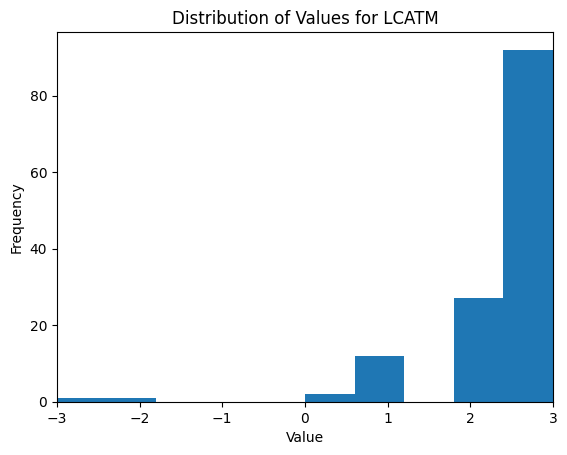

In [ ]:
plt.hist(total_lcatm_scores)

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for LCATM')

## UCATM

In [ ]:
anket1_ucatm_scores = extract_values(cleaned_anket1, "UCATM")
anket2_ucatm_scores = extract_values(cleaned_anket2, "UCATM")
anket3_ucatm_scores = extract_values(cleaned_anket3, "UCATM")
anket4_ucatm_scores = extract_values(cleaned_anket4, "UCATM")

In [ ]:
total_ucatm_scores = anket1_ucatm_scores + anket2_ucatm_scores + anket3_ucatm_scores + anket4_ucatm_scores
total_ucatm_scores = pd.Series(total_ucatm_scores)

In [ ]:
total_ucatm_scores.describe()

Text(0.5, 1.0, 'Distribution of Values for UCATM')

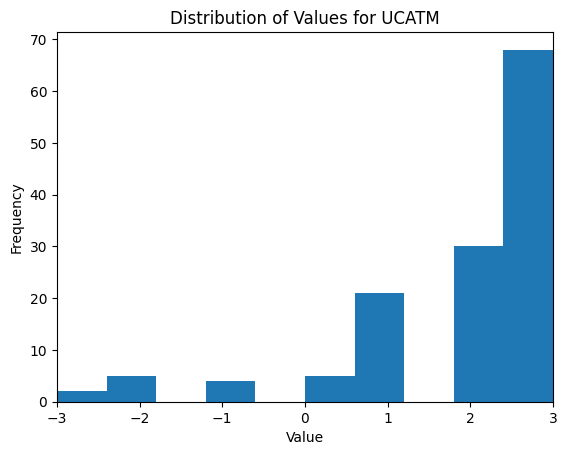

In [ ]:
plt.hist(total_ucatm_scores)

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for UCATM')

## LCATU

In [ ]:
anket1_lcatu_scores = extract_values(cleaned_anket1, "LCATU")
anket2_lcatu_scores = extract_values(cleaned_anket2, "LCATU")
anket3_lcatu_scores = extract_values(cleaned_anket3, "LCATU")
anket4_lcatu_scores = extract_values(cleaned_anket4, "LCATU")

In [ ]:
total_lcatu_scores = anket1_lcatu_scores + anket2_lcatu_scores + anket3_lcatu_scores + anket4_lcatu_scores
total_lcatu_scores = pd.Series(total_lcatu_scores)

In [ ]:
total_lcatu_scores.describe()

count    135.000000
mean      -0.777778
std        1.922633
min       -3.000000
25%       -2.500000
50%       -1.000000
75%        1.000000
max        3.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Values for LCATU')

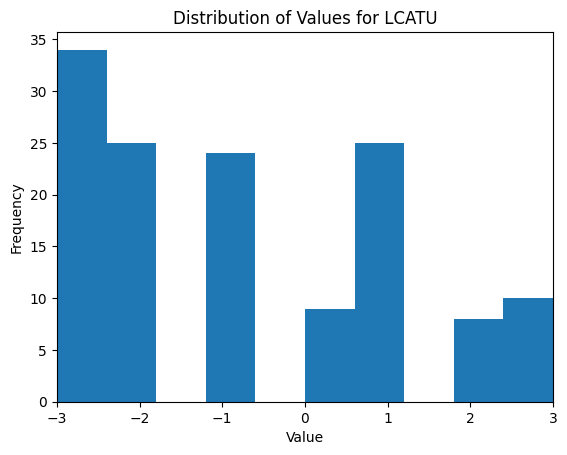

In [ ]:
plt.hist(total_lcatu_scores)

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for LCATU')

## UCATU

In [ ]:
anket1_ucatu_scores = extract_values(cleaned_anket1, "UCATU")
anket2_ucatu_scores = extract_values(cleaned_anket2, "UCATU")
anket3_ucatu_scores = extract_values(cleaned_anket3, "UCATU")
anket4_ucatu_scores = extract_values(cleaned_anket4, "UCATU")

In [ ]:
total_ucatu_scores = anket1_ucatu_scores + anket2_ucatu_scores + anket3_ucatu_scores + anket4_ucatu_scores
total_ucatu_scores = pd.Series(total_ucatu_scores)

In [ ]:
total_ucatu_scores.describe()

count    135.000000
mean      -0.770370
std        1.962106
min       -3.000000
25%       -3.000000
50%       -1.000000
75%        1.000000
max        3.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Values for UCATU')

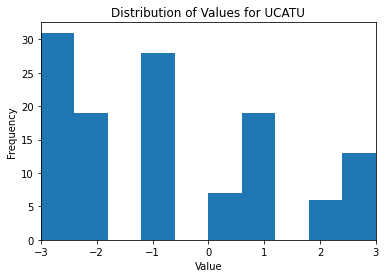

In [ ]:
plt.hist(total_ucatu_scores)

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for UCATU')

## Combined Category Results (Score-based)

In [ ]:
combined_results = pd.concat([total_lcatm_scores,
                              total_ucatm_scores,
                              total_lcatu_scores,
                              total_ucatu_scores], axis=1)
combined_results.columns = ['LCATM', 'UCATM', 'LCATU', 'UCATU']

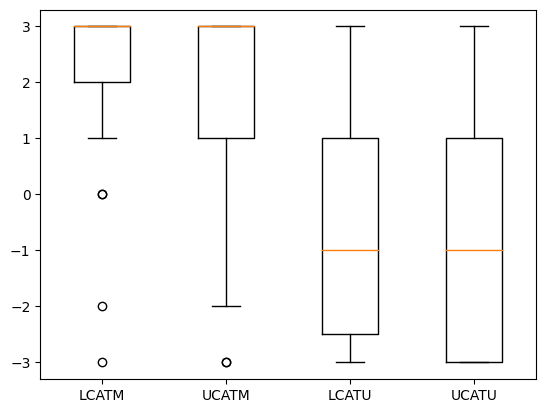

In [ ]:
plt.boxplot(combined_results.values, labels=combined_results.columns, whis=1.96)
plt.show()

# Coordination of Unlike Cases (Score-based)

## LCASEM

In [ ]:
anket1_lcasem_scores = extract_values(cleaned_anket1, "LCASEM")
anket2_lcasem_scores = extract_values(cleaned_anket2, "LCASEM")
anket3_lcasem_scores = extract_values(cleaned_anket3, "LCASEM")
anket4_lcasem_scores = extract_values(cleaned_anket4, "LCASEM")

In [ ]:
total_lcasem_scores = anket1_lcasem_scores + anket2_lcasem_scores + anket3_lcasem_scores + anket4_lcasem_scores
total_lcasem_scores = pd.Series(total_lcasem_scores)

In [ ]:
total_lcasem_scores.describe()

count    135.000000
mean       2.377778
std        1.274706
min       -3.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Values for LCASEM')

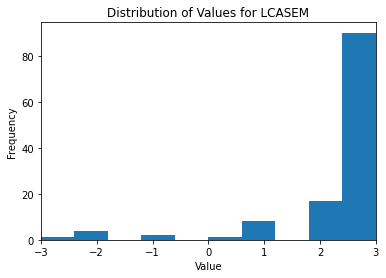

In [ ]:
plt.hist(total_lcasem_scores)

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for LCASEM')

## UCASEM

In [ ]:
anket1_ucasem_scores = extract_values(cleaned_anket1, "UCASEM")
anket2_ucasem_scores = extract_values(cleaned_anket2, "UCASEM")
anket3_ucasem_scores = extract_values(cleaned_anket3, "UCASEM")
anket4_ucasem_scores = extract_values(cleaned_anket4, "UCASEM")

In [ ]:
total_ucasem_scores = anket1_ucasem_scores + anket2_ucasem_scores + anket3_ucasem_scores + anket4_ucasem_scores
total_ucasem_scores = pd.Series(total_ucasem_scores)

In [ ]:
total_ucasem_scores.describe()

count    123.000000
mean       1.739837
std        1.618730
min       -3.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Values for UCASEM')

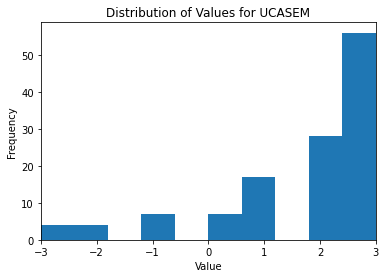

In [ ]:
plt.hist(total_ucasem_scores)

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for UCASEM')

## UCASEU

In [ ]:
anket1_ucaseu_scores = extract_values(cleaned_anket1, "UCASEU")
anket2_ucaseu_scores = extract_values(cleaned_anket2, "UCASEU")
anket3_ucaseu_scores = extract_values(cleaned_anket3, "UCASEU")
anket4_ucaseu_scores = extract_values(cleaned_anket4, "UCASEU")

In [ ]:
total_ucaseu_scores = anket1_ucaseu_scores + anket2_ucaseu_scores + anket3_ucaseu_scores + anket4_ucaseu_scores
total_ucaseu_scores = pd.Series(total_ucaseu_scores)

In [ ]:
total_ucaseu_scores.describe()

count    123.000000
mean      -0.276423
std        2.029701
min       -3.000000
25%       -2.000000
50%       -1.000000
75%        1.000000
max        3.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Values for UCASEU')

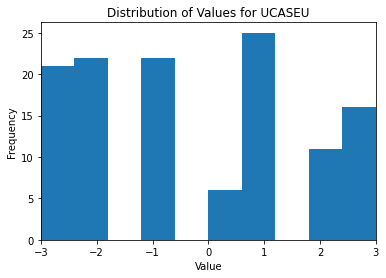

In [ ]:
plt.hist(total_ucaseu_scores)

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for UCASEU')

## Combined Case Results (Score-based)

In [ ]:
combined_case_results = pd.concat([total_lcasem_scores,
                                  total_ucasem_scores,
                                  total_ucaseu_scores], axis=1)
combined_case_results.columns = ['LCASEM', 'UCASEM', 'UCASEU']

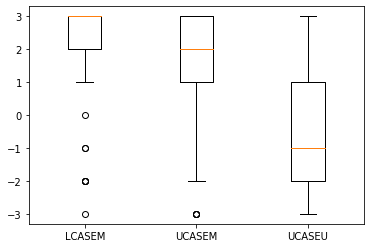

In [ ]:
plt.boxplot(combined_case_results.values, labels=combined_case_results.columns, whis=1.96)
plt.show()

# Coordination of Unlike Categories (Informant-based)

## Informant-based averaged data transformation

In [ ]:
def calculate_condition_means(df, prefix=""):
    # Create a list of the conditions we want to average
    conditions = ["LCATM", "UCATM", "LCATU", "UCATU", "LCASEM", "UCASEM", "UCASEU"]

    # Create a new dataframe to hold the results
    result_df = pd.DataFrame(columns=["id"] + conditions)

    # Iterate over the rows in the input dataframe
    for index, row in df.iterrows():
        # Add the prefix to the participant ID
        participant_id = prefix + str(row["id"])

        # Create a dictionary to hold the means for each condition
        condition_means = {}
        for condition in conditions:
            # Find all columns that correspond to this condition
            columns = [col for col in df.columns if col.startswith(condition)]

            # Calculate the mean for this condition and add it to the dictionary
            condition_means[condition] = row[columns].mean()

        # Add the participant id and condition means to the result dataframe
        result_df.loc[index] = [participant_id] + list(condition_means.values())

    return result_df

In [ ]:
informant_average_dataframe1 = calculate_condition_means(cleaned_anket1, prefix = "I-")
informant_average_dataframe2 = calculate_condition_means(cleaned_anket2, prefix = "II-")
informant_average_dataframe3 = calculate_condition_means(cleaned_anket3, prefix = "III-")
informant_average_dataframe4 = calculate_condition_means(cleaned_anket4, prefix = "IV-")

In [ ]:
informant_compiled = pd.concat([informant_average_dataframe1,
                                           informant_average_dataframe2,
                                           informant_average_dataframe3,
                                           informant_average_dataframe4], ignore_index=True)

In [ ]:
informant_compiled

,id,LCATM,UCATM,LCATU,UCATU,LCASEM,UCASEM,UCASEU
0,I-3,2.666667,3.000000,2.333333,-0.666667,2.666667,3.000000,1.000000
1,I-10,0.666667,2.666667,-2.333333,-2.666667,-1.000000,2.000000,-2.333333
2,I-11,2.333333,0.333333,-2.000000,-2.333333,1.666667,1.000000,-0.666667
3,I-12,3.000000,2.333333,-1.333333,-1.333333,3.000000,2.333333,-0.666667
4,I-14,2.666667,3.000000,-1.666667,-3.000000,3.000000,3.000000,-0.666667
5,I-16,2.666667,2.333333,-1.333333,-0.666667,1.666667,1.666667,0.000000
6,I-17,3.000000,1.666667,-0.333333,0.666667,1.000000,1.666667,1.000000
7,I-18,2.333333,2.666667,0.333333,0.333333,1.333333,1.666667,-0.333333
8,I-19,3.000000,3.000000,-1.666667,-2.666667,2.333333,1.333333,0.000000
9,I-20,2.000000,1.666667,-1.333333,-1.333333,2.666667,1.333333,-1.000000


## LCATM (Inf)

In [ ]:
informant_compiled['LCATM'].describe()

count    41.000000
mean      2.528455
std       0.582025
min       0.666667
25%       2.333333
50%       2.666667
75%       3.000000
max       3.000000
Name: LCATM, dtype: float64

Text(0.5, 1.0, 'Distribution of Values for LCATM (Informant-based)')

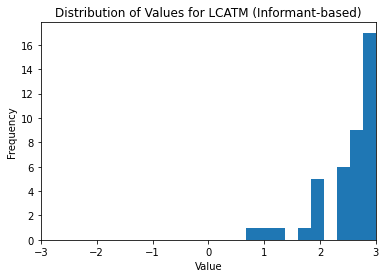

In [ ]:
plt.hist(informant_compiled['LCATM'])

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for LCATM (Informant-based)')

## UCATM (Inf)

In [ ]:
informant_compiled['UCATM'].describe()

count    41.000000
mean      1.951220
std       0.981951
min      -0.666667
25%       1.666667
50%       2.333333
75%       2.666667
max       3.000000
Name: UCATM, dtype: float64

Text(0.5, 1.0, 'Distribution of Values for UCATM (Informant-based)')

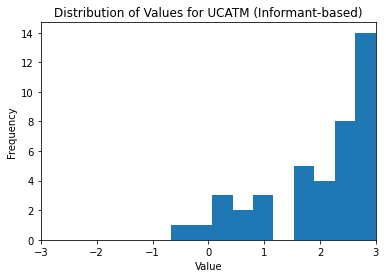

In [ ]:
plt.hist(informant_compiled['UCATM'])

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for UCATM (Informant-based)')

## LCATU (Inf)

In [ ]:
informant_compiled['LCATU'].describe()

count    41.000000
mean     -0.715447
std       1.597847
min      -3.000000
25%      -1.666667
50%      -1.000000
75%       0.333333
max       2.333333
Name: LCATU, dtype: float64

Text(0.5, 1.0, 'Distribution of Values for LCATU (Informant-based)')

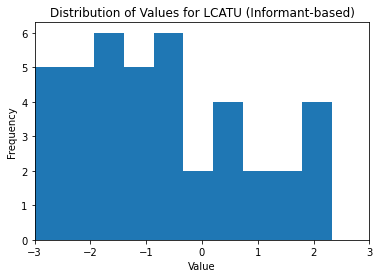

In [ ]:
plt.hist(informant_compiled['LCATU'])

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for LCATU (Informant-based)')

## UCATU (inf)

In [ ]:
informant_compiled['UCATU'].describe()

count    41.000000
mean     -0.723577
std       1.490530
min      -3.000000
25%      -1.666667
50%      -0.666667
75%       0.333333
max       2.666667
Name: UCATU, dtype: float64

Text(0.5, 1.0, 'Distribution of Values for UCATU (Informant-based)')

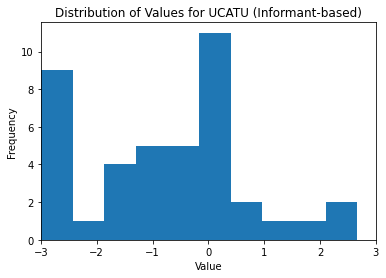

In [ ]:
plt.hist(informant_compiled['UCATU'])

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for UCATU (Informant-based)')

## Combined Category Results (Informant-Based)

Text(0, 0.5, 'Scores')

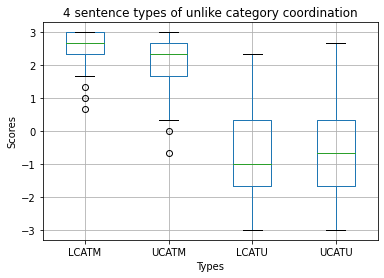

In [ ]:
cols_to_plot = ["LCATM", "UCATM", "LCATU", "UCATU"]

informant_compiled[cols_to_plot].boxplot()

plt.title('4 sentence types of unlike category coordination')
plt.xlabel('Types')
plt.ylabel('Scores')

## Basic Inferential Statistics for Unlike Category Coordination

### LCATM vs. UCATM

#### Checking for normality

By using Shapiro-Wilk test and Q-Q plot we can check whether the data is normally distributed

In [ ]:
print(f"Shapiro-Wilk Test for Normality - LCATM: {stats.shapiro(informant_compiled['LCATM'])}")
print(f"Shapiro-Wilk Test for Normality - UCATM: {stats.shapiro(informant_compiled['UCATM'])}")

Shapiro-Wilk Test for Normality - LCATM: ShapiroResult(statistic=0.7932639122009277, pvalue=3.9575729715579655e-06)
Shapiro-Wilk Test for Normality - UCATM: ShapiroResult(statistic=0.8875293731689453, pvalue=0.0007250687922351062)


Text(0.5, 1.0, 'LCATM Q-Q Plot')

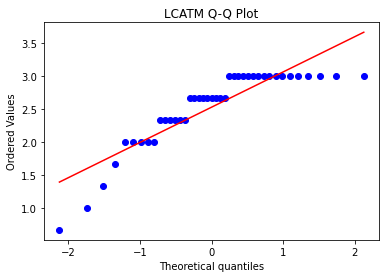

In [ ]:
stats.probplot(informant_compiled['LCATM'], dist="norm", plot=plt)
plt.title("LCATM Q-Q Plot")

Text(0.5, 1.0, 'UCATM Q-Q Plot')

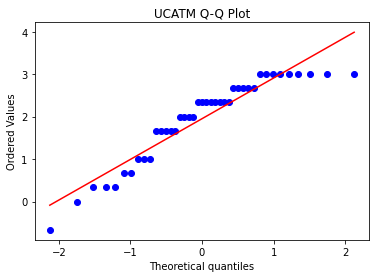

In [ ]:
stats.probplot(informant_compiled['UCATM'], dist="norm", plot=plt)
plt.title("UCATM Q-Q Plot")

#### Test

Since the normality assumptions are violated Wilcoxon signed-rank test is the best option (compared to paired sample t-test)

In [ ]:
t_stat, p_val = stats.ttest_rel(informant_compiled['LCATM'], informant_compiled['UCATM'])

# Print the results
print('Paired samples t-test results:')
print('t-statistic:', t_stat)
print('p-value:', p_val)

Paired samples t-test results:
t-statistic: 3.46320861953508
p-value: 0.0012860924241169522


In [ ]:
from scipy.stats import wilcoxon

stat, pval = wilcoxon(informant_compiled['LCATM'], informant_compiled['UCATM'])

# print the test results
print('Wilcoxon signed-rank results:')
print(f"Wilcoxon signed-rank test statistic: {stat}")
print(f"p-value: {pval}")

Wilcoxon signed-rank results:
Wilcoxon signed-rank test statistic: 91.0
p-value: 0.0011979008388967054


### Like vs. Unlike Functions

In [ ]:
unlike_functions_cat = pd.concat([informant_compiled['LCATU'], informant_compiled['UCATU']]).reset_index(drop=True)
like_functions_cat = pd.concat([informant_compiled['LCATM'], informant_compiled['UCATM']]).reset_index(drop=True)

#### Checking for normality

In [ ]:
print(f"Shapiro-Wilk Test for Normality - Unlike Functions: {stats.shapiro(unlike_functions_cat)}")
print(f"Shapiro-Wilk Test for Normality - Like Functions: {stats.shapiro(like_functions_cat)}")


Shapiro-Wilk Test for Normality - Unlike Functions: ShapiroResult(statistic=0.957204282283783, pvalue=0.008002446964383125)
Shapiro-Wilk Test for Normality - Like Functions: ShapiroResult(statistic=0.8276706337928772, pvalue=2.3124176351529968e-08)


Text(0.5, 1.0, 'Unlike Functions Q-Q Plot')

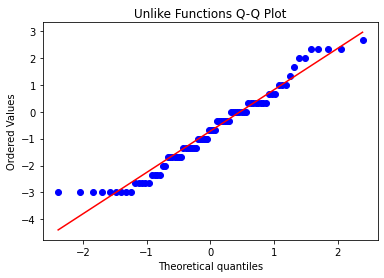

In [ ]:
stats.probplot(unlike_functions_cat, dist="norm", plot=plt)
plt.title("Unlike Functions Q-Q Plot")

Text(0.5, 1.0, 'Like Functions Q-Q Plot')

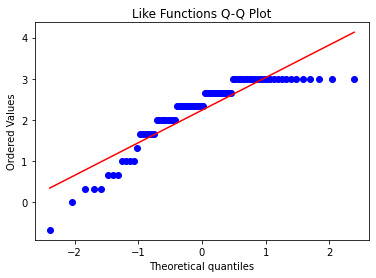

In [ ]:
stats.probplot(like_functions_cat, dist="norm", plot=plt)
plt.title("Like Functions Q-Q Plot")

#### Test

Since the normality assumptions are violated Wilcoxon signed-rank test is the best option (compared to paired sample t-test)

In [ ]:
t_stat, p_val = stats.ttest_rel(like_functions_cat, unlike_functions_cat)

# Print the results
print('Paired samples t-test results:')
print('t-statistic:', t_stat)
print('p-value:', p_val)

Paired samples t-test results:
t-statistic: 15.091006684731829
p-value: 2.990952814615057e-25


In [ ]:
stat, pval = wilcoxon(like_functions_cat, unlike_functions_cat)

# print the test results
print('Wilcoxon signed-rank results:')
print(f"Wilcoxon signed-rank test statistic: {stat}")
print(f"p-value: {pval}")

Wilcoxon signed-rank results:
Wilcoxon signed-rank test statistic: 58.0
p-value: 4.417748755552216e-14
